# California House Price Model

## Project Description
Your task is to predict the average house values in Californian districts, given a number of features for each district:
- Location (Longitude and Latitude)
- Average Houses' Age
- Total Rooms
- Total Bedrooms
- District Population
- Number of Households
- Average Annual Income
- Average House Value
- Proximity to Ocean Categories:One Hour Away from Ocean (1H Ocean), Inland, Near Ocean, Near Bay, Island    

## 1. Import the Basic Libraries

In [183]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Importing the Dataset

In [185]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Tutorial 2/CaliforniaHouseData.csv')
data.head()

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value,Ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# **Display a Random Sample**

In [186]:
import random
my_random_subset = random.sample(range(len(data)), 10)
data.iloc[my_random_subset]

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value,Ocean_proximity
12897,-121.33,38.64,27,2203,493.0,1158,492,2.4342,119500,INLAND
2983,-119.03,35.34,34,2221,436.0,1131,408,3.0486,68500,INLAND
10801,-117.95,33.63,29,1496,282.0,463,215,6.0516,500001,<1H OCEAN
12924,-121.31,38.65,21,2759,409.0,1053,374,5.5000,165700,INLAND
16043,-122.47,37.72,49,1690,307.0,770,294,4.5913,259700,NEAR OCEAN
12460,-114.60,33.60,21,1988,483.0,1182,437,1.6250,62000,INLAND
10566,-117.76,33.71,15,1010,350.0,470,342,3.2229,108300,<1H OCEAN
6570,-118.15,34.21,34,2765,515.0,1422,438,5.4727,238900,INLAND
12420,-116.20,33.70,26,2399,625.0,2654,535,2.2989,60600,INLAND
660,-122.15,37.70,36,1464,244.0,672,261,3.5547,194700,NEAR BAY


## 3. Exploratory Data Analysis (EDA)
In this step, we will use data visualization methods to explore the main characteristics of the dataset.

### 3.1. Reviewing the data for some general information

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Age                 20640 non-null  int64  
 3   Total_rooms         20640 non-null  int64  
 4   Total_bedrooms      20433 non-null  float64
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Income (US $1000K)  20640 non-null  float64
 8   Value               20640 non-null  int64  
 9   Ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [188]:
data['Ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: Ocean_proximity, dtype: int64

### 3.2. Reviewing overall statistical information

In [189]:
data.describe()

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3.3. Getting some insights by plotting differnet variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8637e50e90>,
      dtype=object)

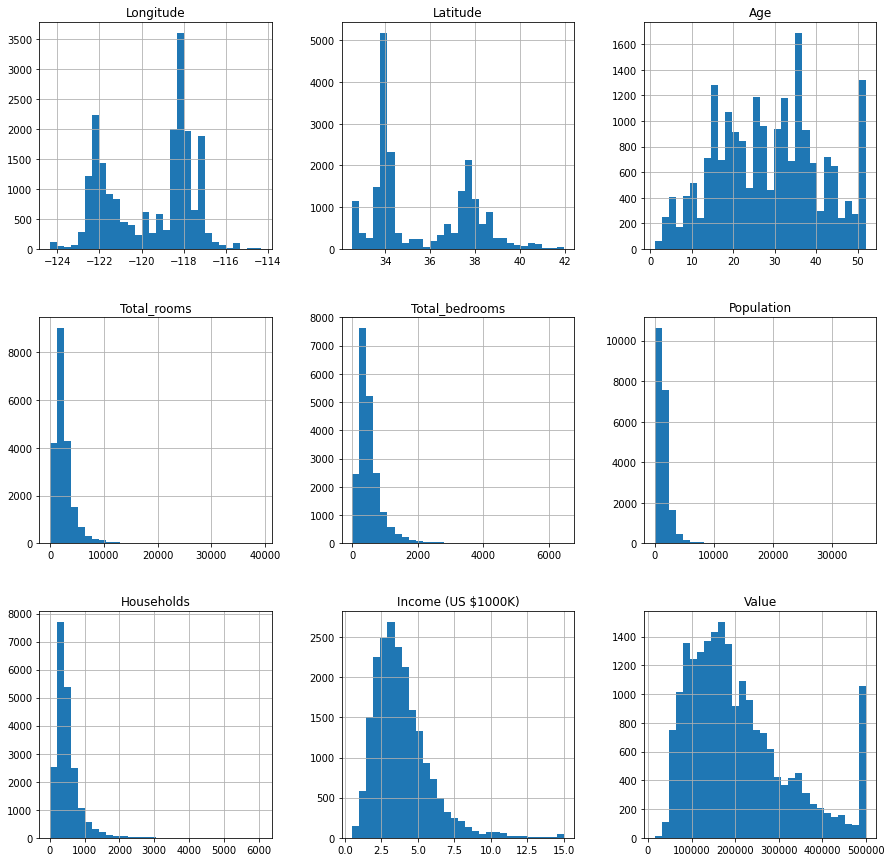

In [190]:
data.hist(bins = 30, figsize = (15,15))

### 3.4. Visualizing the data based on the location

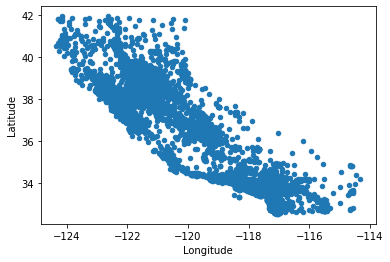

In [191]:
data.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude')

If you pay attention, you notice, the shape of the above graph looks like California! We can also add a new paramter, alpha (transparency), to show shows the denser area with a more intense color. Let's set alpha=0.1

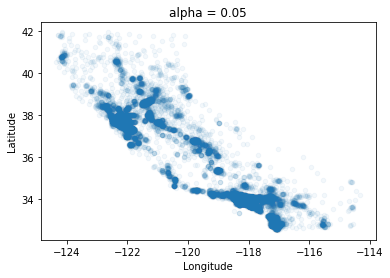

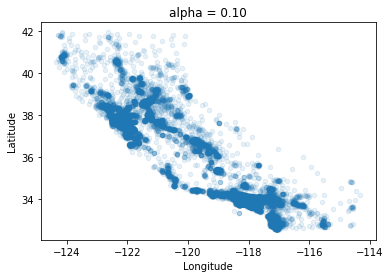

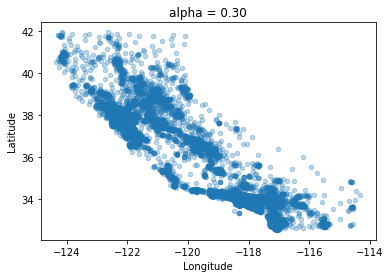

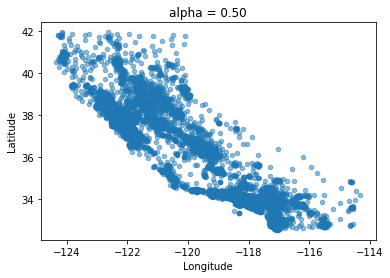

In [192]:
for my_alpha in [0.05, 0.1, 0.3, 0.5]:
  data.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = my_alpha, title = 'alpha = %.2f' %my_alpha)
  
plt.show()

Now, you can clearly see some high-density areas: e.g., areas near the Bay area, Los Angeles, and San Diego. Furthermore, we can visualize the data to check if housing price is related to location and population density.

### 3.5. Visualizing the data based on the house value and population
We can plot the above graph; but this time we show each district's population by radius of each circle (option s), and the color represnts the price (option c). So, the bigger the radius of the dots, means higher population, and a range of colors for the value.   

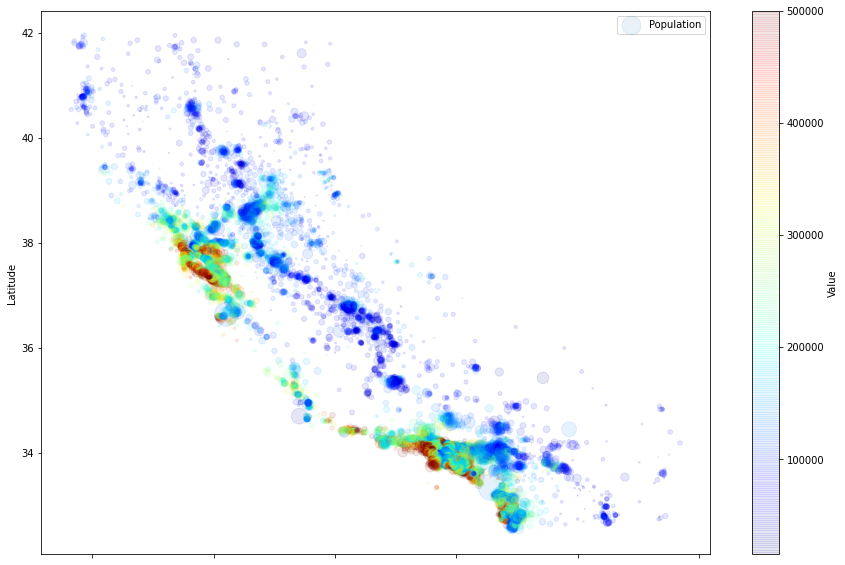

In [193]:
data.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', label = 'Population',
          s = data['Population']/50, c = 'Value', cmap = plt.get_cmap('jet'),
          colorbar = True, alpha = 0.1, figsize = [15, 10])
plt.legend()

We can see that housing price seems to be very related to location and population density.

### 3.6. Checking correlations with the house value
- Here, we want to see how house value correlates to differnt parameters. We can compute the standard correlation coefficint (The Pearsons's r) between house value and other parameters. 
- The correlation coefficient ranges from -1 to +1. When it is close to +1, it means that there is a strong positive correlation (for example, by increasing the parameter the house value goes up); and when it is close to -1, it means that there is a strong negative correlation(for example, by increasing the parameter the house value comes down).<br>
- Please note, correlation coefficient 1 means, comparing a parameter with itself. 

In [194]:
r_matrix = data.corr()
r_matrix.head()

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value
Longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
Latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
Age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
Total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
Total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686


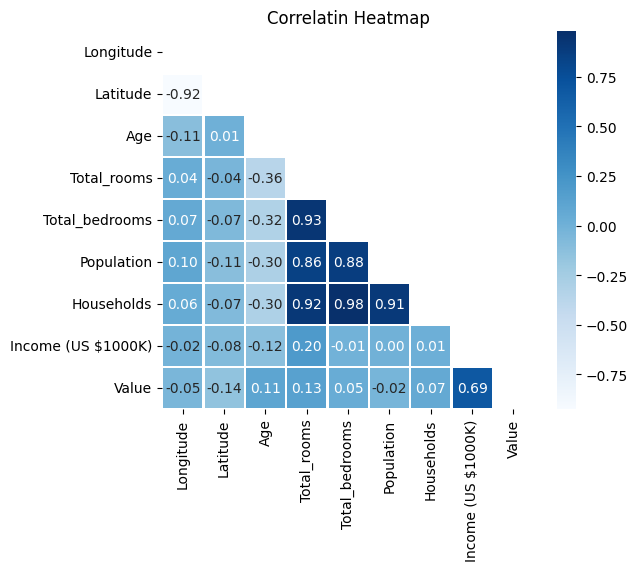

In [195]:
r_mask = np.triu(np.ones_like(r_matrix, dtype = bool))
from seaborn import heatmap
plt.figure(figsize = [6,5], dpi = 100)
plt.title('Correlatin Heatmap')
heatmap(r_matrix, mask=r_mask, annot=True, lw=1, linecolor='White', cmap='Blues', fmt = "0.2f")

In [196]:
r_matrix['Value'].sort_values()

Latitude             -0.144160
Longitude            -0.045967
Population           -0.024650
Total_bedrooms        0.049686
Households            0.065843
Age                   0.105623
Total_rooms           0.134153
Income (US $1000K)    0.688075
Value                 1.000000
Name: Value, dtype: float64

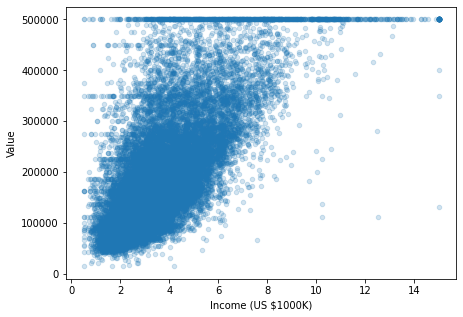

In [197]:
data.plot(kind = 'scatter', x = 'Income (US $1000K)', y = 'Value', alpha = 0.2, figsize = [7, 5])

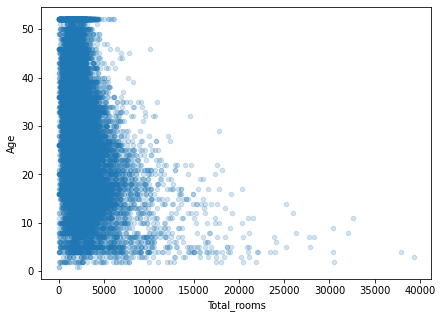

In [198]:
data.plot(kind = 'scatter', x = 'Total_rooms', y = 'Age', alpha = 0.2, figsize = [7, 5])

### 3.7. Creating new features and checking their correlations with the house value

In [199]:
data["Rooms_per_household"] = data["Total_rooms"] / data["Households"]
data["Bedrooms_per_room"] = data["Total_bedrooms"] / data["Total_rooms"]
data["Population_per_household"] = data["Population"] / data["Households"]
r_matrix = data.corr()
r_matrix

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value,Rooms_per_household,Bedrooms_per_room,Population_per_household
Longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
Latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
Age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
Total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
Total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
Population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
Households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
Income (US $1000K),-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
Value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
Rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


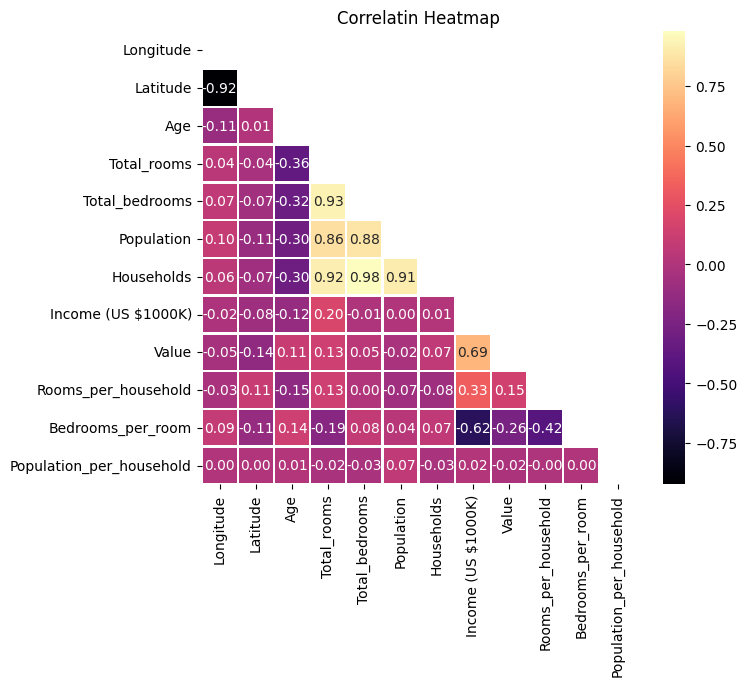

In [200]:
r_mask = np.triu(np.ones_like(r_matrix, dtype = bool))
from seaborn import heatmap
plt.figure(figsize = [7,6], dpi = 100)
plt.title('Correlatin Heatmap')
heatmap(r_matrix, mask=r_mask, annot=True, lw=1, linecolor='White', cmap='magma', fmt = "0.2f")

In [201]:
r_matrix['Value'].sort_values()

Bedrooms_per_room          -0.255880
Latitude                   -0.144160
Longitude                  -0.045967
Population                 -0.024650
Population_per_household   -0.023737
Total_bedrooms              0.049686
Households                  0.065843
Age                         0.105623
Total_rooms                 0.134153
Rooms_per_household         0.151948
Income (US $1000K)          0.688075
Value                       1.000000
Name: Value, dtype: float64

Rooms_per_household and bedrooms_per_room have better correlations with the house value than population_per_household.

## 4. Preprocessing the Data for Machine Learning

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Longitude                 20640 non-null  float64
 1   Latitude                  20640 non-null  float64
 2   Age                       20640 non-null  int64  
 3   Total_rooms               20640 non-null  int64  
 4   Total_bedrooms            20433 non-null  float64
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Income (US $1000K)        20640 non-null  float64
 8   Value                     20640 non-null  int64  
 9   Ocean_proximity           20640 non-null  object 
 10  Rooms_per_household       20640 non-null  float64
 11  Bedrooms_per_room         20433 non-null  float64
 12  Population_per_household  20640 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ MB


### 4.1. Rearranging the sequence of the data
- Put all numerical data in the first 10 columns.
- Put house value at the 2nd last column.
- Put the catogorical data (ocean proximity) as the last column.

In [203]:
my_string = data.columns
my_string

Index(['Longitude', 'Latitude', 'Age', 'Total_rooms', 'Total_bedrooms',
       'Population', 'Households', 'Income (US $1000K)', 'Value',
       'Ocean_proximity', 'Rooms_per_household', 'Bedrooms_per_room',
       'Population_per_household'],
      dtype='object')

In [204]:
new_columns = ['Longitude', 'Latitude', 'Age', 'Total_rooms', 'Total_bedrooms',
       'Population', 'Households', 'Income (US $1000K)',  'Rooms_per_household', 'Bedrooms_per_room',
       'Population_per_household', 'Ocean_proximity', 'Value']
data = data.reindex(columns=new_columns)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Longitude                 20640 non-null  float64
 1   Latitude                  20640 non-null  float64
 2   Age                       20640 non-null  int64  
 3   Total_rooms               20640 non-null  int64  
 4   Total_bedrooms            20433 non-null  float64
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Income (US $1000K)        20640 non-null  float64
 8   Rooms_per_household       20640 non-null  float64
 9   Bedrooms_per_room         20433 non-null  float64
 10  Population_per_household  20640 non-null  float64
 11  Ocean_proximity           20640 non-null  object 
 12  Value                     20640 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ MB


We have some missing data.

### 4.2. Seperating the input data from the output data.

In [206]:
X = data.iloc[:, :-2].values #skipping Ocean_proximity for now
y = data.iloc[:, -1].values

### 4.3. Imputing the missing numerical data

In [207]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = my_imputer.fit_transform(X)

### 4.4. Taking care of the outliers in the numerical data

In [208]:
from sklearn.neighbors import LocalOutlierFactor
my_lof = LocalOutlierFactor(contamination=0.01)
y_hat = my_lof.fit_predict(X) #returns +1 for inliers and -1 for outliers
outlier_mask = (y_hat != -1)
print('Before Outlier removal: \nX.shape = ', X.shape, ' and y.shape = ', y.shape)
X, y = X[outlier_mask, :], y[outlier_mask]
print('After Outlier removal: \nX.shape = ', X.shape, ' and y.shape = ', y.shape)

Before Outlier removal: 
X.shape =  (20640, 11)  and y.shape =  (20640,)
After Outlier removal: 
X.shape =  (20433, 11)  and y.shape =  (20433,)


### 4.5. Scaling the numerical data 

In [209]:
from sklearn.preprocessing import StandardScaler
my_sc = StandardScaler()
X_std = my_sc.fit_transform(X)

### 4.6. Encoding the categorical data

In [210]:
from sklearn.preprocessing import OneHotEncoder
my_enc = OneHotEncoder()
encoded_data = my_enc.fit_transform(data['Ocean_proximity'].values.reshape(-1, 1)).toarray()
# my_enc.fit_transform() accepts only column vectors and returns sparse matrix
# you need to convert the matrix into ndarray
encoded_data.shape

(20640, 5)

In [211]:
encoded_data = encoded_data[outlier_mask]
encoded_data.shape

(20433, 5)

##### Combining the numerical and categorical training data

In [212]:
X = np.concatenate((X, encoded_data), axis = 1)

##### A quick check on the preprocssed training data

In [213]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


### 4.7. Splitting the dataset into the training set and test Set

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5. Training the Linear Regression Model with the Training Set

In [215]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

## 6. Checking the Trained Model with the Test Set

In [216]:
y_pred = my_model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('R2 Score = %.3f' %score)

R2 Score = 0.674


# 7. Exploring other methods


In [217]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_score = r2_score(y_test,y_pred)
print('R2 Score = %.3f' %rf_score)

R2 Score = 0.803
